In [1]:
import random

import numpy as np
import pandas as pd

In [59]:
def woe_iv(data, feature, smooth=0.5):
    new_data = pd.crosstab(data[feature[0]], data[feature[1]], normalize='columns')
    new_data = new_data.assign(woe=lambda x: np.log((x[1] + smooth)/(x[0] + smooth)))
    new_data = new_data.assign(iv=lambda x: x['woe'] * (x[1] - x[0]))

    return new_data

data = pd.DataFrame(
    {'index': range(20),
     'cls1': np.random.choice(list('ABCD'),size=(20)),
     'good_bad': np.random.choice([0, 1],size=(20))})

data2 = pd.DataFrame({'index': range(7),
     'cls1': ['A', 'A', 'A', 'A', 'B', 'B', 'B'],
     'good_bad': [1, 1, 1, 1, 0, 0, 0]})
print(data2)
woe = woe_iv(data2, ['cls1', 'good_bad'], smooth=1)
print(woe)
print('sum(iv): %.4f' % woe['iv'].sum())

print("------------")
woe2 = woe_iv(data2, ['index', 'good_bad'], smooth=1)
print(woe2)
print('sum(iv): %.4f' % woe2['iv'].sum())

   index cls1  good_bad
0      0    A         1
1      1    A         1
2      2    A         1
3      3    A         1
4      4    B         0
5      5    B         0
6      6    B         0
good_bad    0    1       woe        iv
cls1                                  
A         0.0  1.0  0.693147  0.693147
B         1.0  0.0 -0.693147  0.693147
sum(iv): 1.3863
------------
good_bad         0     1       woe        iv
index                                       
0         0.000000  0.25  0.223144  0.055786
1         0.000000  0.25  0.223144  0.055786
2         0.000000  0.25  0.223144  0.055786
3         0.000000  0.25  0.223144  0.055786
4         0.333333  0.00 -0.287682  0.095894
5         0.333333  0.00 -0.287682  0.095894
6         0.333333  0.00 -0.287682  0.095894
sum(iv): 0.5108


In [58]:
x = pd.crosstab(data2['cls1'], data2['good_bad'], normalize='columns')
print(x)

good_bad         0    1
cls1                   
A         0.000000  0.5
B         0.333333  0.5
C         0.666667  0.0


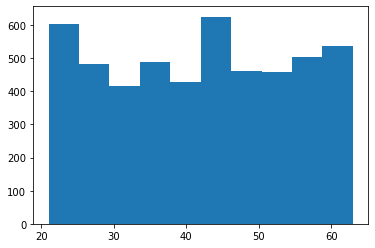

In [60]:
data = pd.DataFrame(
    {'index': range(5000),
     'age': np.random.randint(21, 64, 5000)})

import matplotlib.pyplot as plt
plt.hist(data['age'])
plt.show()
